In [1]:
import pandas as pd 
import numpy as np 
import geopandas as gpd
import geoplot as gplt

# Session3: Data Exploreation
- Time data formatting, Time data substraction, subsetting and so on 
- Geographical Datatypes in Columns, basic shapely, within contains and so on 
- GroupBy operation, more complex function on groupby

In [10]:
# df_rw.sample(frac=0.05).to_csv('Sampled.csv', index=False)

In [25]:
df_monitor = pd.read_csv('Sampled.csv')
df_monitor.head()

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2018-06-15 23:00:00,23,15,6,2018,5,Usaquen,6.0,-74.030417,4.710363
1,2018-04-21 17:00:00,17,21,4,2018,6,Kennedy,11.0,-74.161333,4.625062
2,2018-12-30 04:00:00,4,30,12,2018,7,MinAmbiente,14.0,-74.066867,4.625562
3,2017-04-16 01:00:00,1,16,4,2017,7,Puente Aranda,12.8,-74.117483,4.631779
4,2017-03-08 20:00:00,20,8,3,2017,3,Usaquen,20.0,-74.030417,4.710363


## Get rid of outliers:

In [26]:
df_monitor.dtypes

Fecha        object
Hora          int64
Dia           int64
Mes           int64
Ano           int64
DiaSem        int64
Estacion     object
PM2.5        object
Longitud    float64
Latitud     float64
dtype: object

In [27]:
df_monitor['PM2.5'].astype(float)

ValueError: could not convert string to float: 'hi'

In [28]:
df_monitor['PM2.5'].value_counts()

6.0      256
8.0      209
7.0      206
9.0      205
5.0      178
        ... 
48.2       1
-16.0      1
73.3       1
45.6       1
47.4       1
Name: PM2.5, Length: 575, dtype: int64

In [29]:
def test_apply(x):
    try:
        return float(x)
    except ValueError:
        return None

df_monitor['PM2.5'] = df_monitor['PM2.5'].apply(test_apply)

In [30]:
df_monitor['PM2.5'] = df_monitor['PM2.5'].astype(float)

In [31]:
df_monitor[df_monitor['PM2.5'].isna()]

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
56,2017-08-05 08:00:00,8,5,8,2017,6,Suba,NaN,-74.093483,4.761363
65,2018-02-21 20:00:00,20,21,2,2018,3,Las Ferias,NaN,-74.082483,4.690713
2147,2018-07-17 07:00:00,7,17,7,2018,2,Carvajal - Sevillana,NaN,-74.148583,4.595629
2451,2017-01-21 00:00:00,0,21,1,2017,6,Las Ferias,NaN,-74.082483,4.690713


In [32]:
df_monitor = df_monitor.dropna()

In [33]:
df_monitor.dtypes

Fecha        object
Hora          int64
Dia           int64
Mes           int64
Ano           int64
DiaSem        int64
Estacion     object
PM2.5       float64
Longitud    float64
Latitud     float64
dtype: object

In [34]:
df_monitor['PM2.5'].describe()

count    7698.000000
mean       17.887971
std        13.267479
min       -40.000000
25%         8.000000
50%        15.000000
75%        25.000000
max       114.000000
Name: PM2.5, dtype: float64

In [35]:
df_monitor = df_monitor[df_monitor['PM2.5'] > 0]

## Change Datatype into time

In [36]:
df_monitor['Fecha'] = pd.to_datetime(df_monitor['Fecha'],format=r'%Y-%m-%d %H:%M:%S')
df_monitor

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
0,2018-06-15 23:00:00,23,15,6,2018,5,Usaquen,6.0,-74.030417,4.710363
1,2018-04-21 17:00:00,17,21,4,2018,6,Kennedy,11.0,-74.161333,4.625062
2,2018-12-30 04:00:00,4,30,12,2018,7,MinAmbiente,14.0,-74.066867,4.625562
3,2017-04-16 01:00:00,1,16,4,2017,7,Puente Aranda,12.8,-74.117483,4.631779
4,2017-03-08 20:00:00,20,8,3,2017,3,Usaquen,20.0,-74.030417,4.710363
...,...,...,...,...,...,...,...,...,...,...
7697,2018-08-11 10:00:00,10,11,8,2018,6,Puente Aranda,16.5,-74.117483,4.631779
7698,2017-07-31 21:00:00,21,31,7,2017,1,Suba,20.0,-74.093483,4.761363
7699,2017-01-31 13:00:00,13,31,1,2017,2,Usaquen,5.0,-74.030417,4.710363
7700,2018-03-04 18:00:00,18,4,3,2018,7,Puente Aranda,23.8,-74.117483,4.631779


In [37]:
df_monitor = df_monitor.sort_values(by='Fecha', ascending=True)
df_monitor

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
5618,2017-01-01 02:00:00,2,1,1,2017,7,Centro de Alto Rendimiento,32.8,-74.083967,4.658479
4076,2017-01-01 04:00:00,4,1,1,2017,7,Guaymaral,10.0,-74.043783,4.783746
3903,2017-01-01 05:00:00,5,1,1,2017,7,Puente Aranda,8.1,-74.117483,4.631779
4817,2017-01-01 10:00:00,10,1,1,2017,7,Carvajal - Sevillana,7.2,-74.148583,4.595629
6778,2017-01-01 20:00:00,20,1,1,2017,7,Suba,12.0,-74.093483,4.761363
...,...,...,...,...,...,...,...,...,...,...
5104,2018-12-31 15:00:00,15,31,12,2018,1,Las Ferias,2.0,-74.082483,4.690713
210,2018-12-31 16:00:00,16,31,12,2018,1,MinAmbiente,4.0,-74.066867,4.625562
2987,2018-12-31 18:00:00,18,31,12,2018,1,MinAmbiente,4.0,-74.066867,4.625562
3088,2018-12-31 21:00:00,21,31,12,2018,1,Kennedy,17.0,-74.161333,4.625062


In [38]:
df_monitor = df_monitor[df_monitor['Fecha'] < pd.to_datetime('2018-08-20 18:00:00',format=r'%Y-%m-%d %H:%M:%S')]
df_monitor

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud
5618,2017-01-01 02:00:00,2,1,1,2017,7,Centro de Alto Rendimiento,32.8,-74.083967,4.658479
4076,2017-01-01 04:00:00,4,1,1,2017,7,Guaymaral,10.0,-74.043783,4.783746
3903,2017-01-01 05:00:00,5,1,1,2017,7,Puente Aranda,8.1,-74.117483,4.631779
4817,2017-01-01 10:00:00,10,1,1,2017,7,Carvajal - Sevillana,7.2,-74.148583,4.595629
6778,2017-01-01 20:00:00,20,1,1,2017,7,Suba,12.0,-74.093483,4.761363
...,...,...,...,...,...,...,...,...,...,...
6125,2018-08-20 05:00:00,5,20,8,2018,1,Puente Aranda,3.2,-74.117483,4.631779
5433,2018-08-20 06:00:00,6,20,8,2018,1,Las Ferias,4.0,-74.082483,4.690713
1909,2018-08-20 06:00:00,6,20,8,2018,1,Guaymaral,6.0,-74.043783,4.783746
3415,2018-08-20 15:00:00,15,20,8,2018,1,Centro de Alto Rendimiento,1.7,-74.083967,4.658479


## 3. Groupby

In [39]:
srs_mean = df_monitor[['PM2.5','Estacion']].groupby(by='Estacion').mean()
srs_mean.sort_values(by='PM2.5')

,PM2.5
Estacion,
Usaquen,13.028125
San Cristobal,13.130368
Guaymaral,14.410413
MinAmbiente,15.403194
Centro de Alto Rendimiento,15.794274
Puente Aranda,17.116975
Las Ferias,17.209047
Suba,18.713873
Kennedy,26.637500


In [40]:
srs_mean = df_monitor[['PM2.5','Estacion','Longitud','Latitud']].groupby(by=['Longitud','Latitud']).mean()
srs_mean.sort_values(by='PM2.5')

,,PM2.5
Longitud,Latitud,
-74.030417,4.710363,13.028125
-74.083800,4.572662,13.130368
-74.043783,4.783746,14.410413
-74.066867,4.625562,15.403194
-74.083967,4.658479,15.794274
-74.117483,4.631779,17.116975
-74.082483,4.690713,17.209047
-74.093483,4.761363,18.713873
-74.161333,4.625062,26.637500


In [41]:
df_monitor[['PM2.5','Estacion','Longitud','Latitud']]

,PM2.5,Estacion,Longitud,Latitud
5618,32.8,Centro de Alto Rendimiento,-74.083967,4.658479
4076,10.0,Guaymaral,-74.043783,4.783746
3903,8.1,Puente Aranda,-74.117483,4.631779
4817,7.2,Carvajal - Sevillana,-74.148583,4.595629
6778,12.0,Suba,-74.093483,4.761363
...,...,...,...,...
6125,3.2,Puente Aranda,-74.117483,4.631779
5433,4.0,Las Ferias,-74.082483,4.690713
1909,6.0,Guaymaral,-74.043783,4.783746
3415,1.7,Centro de Alto Rendimiento,-74.083967,4.658479


In [49]:
stngrp = df_monitor[['PM2.5','Estacion','Longitud','Latitud','Fecha']].groupby(by='Estacion')
type(stngrp)

pandas.core.groupby.generic.DataFrameGroupBy

In [50]:
len(stngrp)

10

In [51]:
df_monitor['Estacion'].value_counts().shape

(10,)

In [52]:
for stn, df_i in stngrp:
    print('Staition {} has a dataframe of \n {}'.format(stn, df_i))

Staition Carvajal - Sevillana has a dataframe of 
       PM2.5              Estacion   Longitud   Latitud               Fecha
4817    7.2  Carvajal - Sevillana -74.148583  4.595629 2017-01-01 10:00:00
93     35.2  Carvajal - Sevillana -74.148583  4.595629 2017-01-03 09:00:00
4336   17.6  Carvajal - Sevillana -74.148583  4.595629 2017-01-03 15:00:00
7226   24.6  Carvajal - Sevillana -74.148583  4.595629 2017-01-03 17:00:00
4839   15.0  Carvajal - Sevillana -74.148583  4.595629 2017-01-03 19:00:00
...     ...                   ...        ...       ...                 ...
7648   35.9  Carvajal - Sevillana -74.148583  4.595629 2018-08-17 10:00:00
4125   22.8  Carvajal - Sevillana -74.148583  4.595629 2018-08-18 17:00:00
5304   35.9  Carvajal - Sevillana -74.148583  4.595629 2018-08-18 20:00:00
7493   21.8  Carvajal - Sevillana -74.148583  4.595629 2018-08-19 22:00:00
5318   23.6  Carvajal - Sevillana -74.148583  4.595629 2018-08-19 23:00:00

[677 rows x 5 columns]
Staition Centro de Alto R

In [54]:
# df_sliced = df_monitor[['PM2.5','Estacion','Longitud','Latitud']]
df_i = stngrp.get_group('Usaquen')
df_i

,PM2.5,Estacion,Longitud,Latitud,Fecha
4708,11.0,Usaquen,-74.030417,4.710363,2017-01-03 10:00:00
7477,6.0,Usaquen,-74.030417,4.710363,2017-01-03 19:00:00
5358,12.0,Usaquen,-74.030417,4.710363,2017-01-03 23:00:00
5198,18.0,Usaquen,-74.030417,4.710363,2017-01-05 01:00:00
3598,12.0,Usaquen,-74.030417,4.710363,2017-01-06 08:00:00
...,...,...,...,...,...
3645,7.0,Usaquen,-74.030417,4.710363,2018-08-13 21:00:00
1149,2.0,Usaquen,-74.030417,4.710363,2018-08-15 01:00:00
7084,3.0,Usaquen,-74.030417,4.710363,2018-08-15 10:00:00
3630,20.0,Usaquen,-74.030417,4.710363,2018-08-16 07:00:00


In [55]:
import matplotlib.pyplot as plt

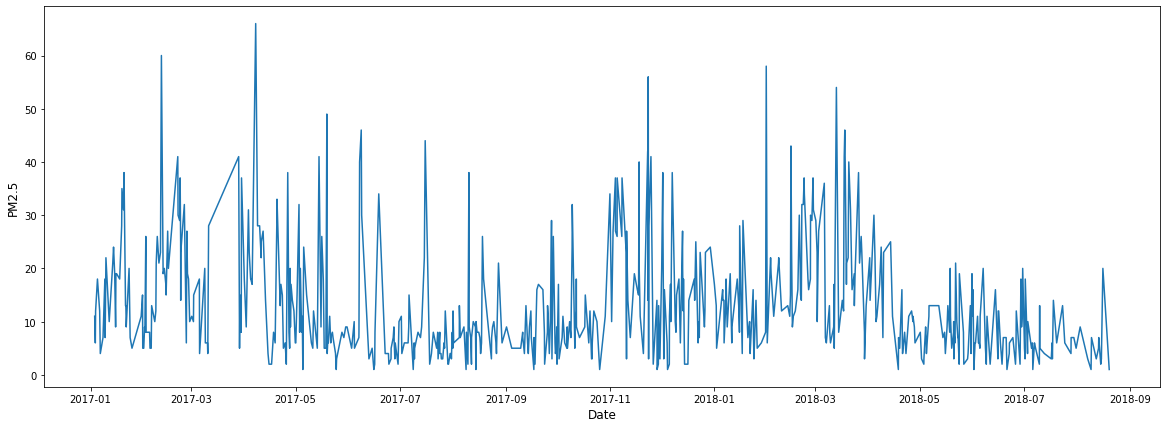

In [63]:
plt.figure(figsize=(20,7))
plt.plot(df_i['Fecha'], df_i['PM2.5'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5', fontsize=12)
plt.show()

## Exercise 1 plot the monthly PM2.5 of Usaquen staition

## Exercise1 Subtract two lists:
Given two lists $l_1$ and $l_2$, write an function such that it subtract one list from another

In [79]:
import geopandas as gpd
import geoplot as gplt
from shapely.geometry import Point, Polygon

In [85]:
from matplotlib.pyplot import axis


gdfmon  = gpd.GeoDataFrame(df_monitor, geometry=df_monitor[['Latitud','Longitud']].apply(lambda rw : Point(rw['Latitud'], rw['Longitud'])), axis=1)

KeyError: 'Latitud'

In [82]:
gdfmon

,Fecha,Hora,Dia,Mes,Ano,DiaSem,Estacion,PM2.5,Longitud,Latitud,geometry
5618,2017-01-01 02:00:00,2,1,1,2017,7,Centro de Alto Rendimiento,32.8,-74.083967,4.658479,None
4076,2017-01-01 04:00:00,4,1,1,2017,7,Guaymaral,10.0,-74.043783,4.783746,None
3903,2017-01-01 05:00:00,5,1,1,2017,7,Puente Aranda,8.1,-74.117483,4.631779,None
4817,2017-01-01 10:00:00,10,1,1,2017,7,Carvajal - Sevillana,7.2,-74.148583,4.595629,None
6778,2017-01-01 20:00:00,20,1,1,2017,7,Suba,12.0,-74.093483,4.761363,None
...,...,...,...,...,...,...,...,...,...,...,...
6125,2018-08-20 05:00:00,5,20,8,2018,1,Puente Aranda,3.2,-74.117483,4.631779,None
5433,2018-08-20 06:00:00,6,20,8,2018,1,Las Ferias,4.0,-74.082483,4.690713,None
1909,2018-08-20 06:00:00,6,20,8,2018,1,Guaymaral,6.0,-74.043783,4.783746,None
3415,2018-08-20 15:00:00,15,20,8,2018,1,Centro de Alto Rendimiento,1.7,-74.083967,4.658479,None
